<a href="https://colab.research.google.com/github/Deare-stack/GenAI/blob/main/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Importing Libraries

# numerical operations
import numpy as np

# used for plotting
import matplotlib.pyplot as plt

# used for calculating distances
from scipy.spatial import distance

In [ ]:
#@title Defining Known Land Mass Points

# A dictionary where each key is a continent and the value is a list of tuples
# representing points on that continent.

land_points = {
    'South America': [(-30, -60), (-15, -50), (0, -45), (15, -30), (30, -20)],
    'Australia': [(50, 10), (55, 0), (60, 10), (65, 20), (70, 30)],
    'Asia': [(20, 60), (30, 70), (40, 80), (50, 90), (60, 100)],
    'Africa': [(0, 20), (10, 20), (20, 30), (30, 40), (40, 50)],
    'Europe': [(-35, 140), (-30, 145), (-25, 150), (-20, 155), (-15, 160)]
}


In [ ]:
#@title Defining a Grid of Points

# Create a grid of points with latitude ranging from -90 to 90 and longitude
# from -180 to 180 in steps of 10.

grid_points = [(x, y) for x in range(-90, 91, 10) for y in range(-180, 181, 10)]

In [ ]:
#@title Calculating Prior Probabilities

# This function calculates the prior probabilities of a point being land or sea based on
# the number of land points versus the total points.

def calculate_prior_probabilities(land_points, total_points):
    P_land = sum(len(points) for points in land_points.values()) / total_points
    P_sea = 1 - P_land

    return P_land, P_sea

In [ ]:
#@title Calculating Likelihoods

# This function calculates the likelihoods of points being land or sea based on their distances
# to the nearest land point.

# The likelihood decreases exponentially with increasing distance from land.

def calculate_likelihoods(grid_points, land_points):
    likelihoods_land = {}
    likelihoods_sea = {}

    all_land_points = [point for points in land_points.values() for point in points]

    for point in grid_points:
        distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()
        likelihoods_land[point] = np.exp(-distances_to_land)  # Exponential decay
        likelihoods_sea[point] = 1 - likelihoods_land[point]  # Opposite of land

    return likelihoods_land, likelihoods_sea

In [ ]:
#@title Classifying Points

# This function classifies a point as land if it lies within the defined bounds of
# the "land model" box, otherwise classifies it as sea.

##1. Modify the Classification Function:
## The first step of modifying the classify_point fuction in order to determine if a point is within the threshold of Coastline.

def classify_point(point, box_bounds,coastline_threshold=10):##Add the distance_threshold within 10 unit distance from any land point for Coastline
    x_min, x_max, y_min, y_max = box_bounds##The box_bounds Tuple contains for value which are x_min repersenting the minimum longitude
                                          ##The x_max refers to the maximum longitude
                                          ##The y_min refers to the minimum latitude
                                          ##The y_max refers to the maximum latitude

    ##The output of all_land_points is all point of continent which listed in land_point dictionary
    all_land_points = [land_point for continent in land_points.values() for land_point in continent]
    ##Caluculate the distances between a single point and other all land points and then finds the minimum of those distances
    distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()
    if distances_to_land <= coastline_threshold:##Check whether a specific point is classified as a "Coastline" based on its distance from the nearest point of land.
                                                ##Checks whether the calculated minimum distance (distances_to_land) is less than or equal to the coastline_threshold which is 10 unit distance.
        print(f"Point {point} classified as Coastline")
        return 'Coastline'
    elif any(x_min <= point[0] <= x_max and y_min <= point[1] <= y_max for x_min, x_max, y_min, y_max in [box_bounds]):##Check if the points are within the orange bouding box
                                                                                                                      ##using any()function checks whether the coordinates of point fall within the ranges defined by x_min, x_max, y_min, and y_max.
        return 'Land'##if the points are in orange bouding box then it will return land, means the points are located in the Land.
    else:
        return 'Sea'##Otherwise it will return sea, means the points are located in sea.

In [ ]:
#@title Plotting the Points and Model

# This functions plots the land points, test points, and the bounding box of
# the land model on a 2D plot.

# Function to plot the points and the model

##2. Update the Plotting Function:
## purpose to update the plot_points function to add a new color and a legend for the "Coastline" points.

def plot_points(land_points, test_points, test_classifications, box_bounds):
    fig, ax = plt.subplots()##This line using Matplotlib's pyplot module used to polt data

    # Define colors for each continent
    continent_colors = {
        'South America': 'green',
        'Europe': 'red',
        'Asia': 'blue',
        'Africa': 'purple',
        'Australia': 'orange'
    }
    ##classification_colors maps classifications of Land, Sea, coasline to specific colors
    ##Value is a string representing the color used to plot data points or areas
    ##Land for green, Sea for blue, Coastline for yellow color
    classification_colors = {
        'Land': 'green',
        'Sea': 'blue',
        'Coastline': 'yellow'
    }

    ##iterates through land_points, using the zip(*points) method to separate tuples which one for x-coordinates (longitude) and one for y-coordinates (latitude)
    ##using ax.scatter()plotted on a scatter plot, using continent_colors confirm the color for each set of points
    for continent, points in land_points.items():
        land_x, land_y = zip(*points)
        ax.scatter(land_x, land_y, color=continent_colors[continent], label=f'{continent}')
    ##Unpacking box_bounds
    ##ax.plot()is used to draw the rectangle that represents the orange bounding box and marking it label as land model
    x_min, x_max, y_min, y_max = box_bounds
    ax.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], color='orange', label='Land Model')

    ##iterates through test_points and test_classifications and Set Color Based on classification_colors
    ##ax.scatter(*point....) plots a single point
    for point, classification in zip(test_points, test_classifications):
        color = classification_colors[classification]
        ax.scatter(*point, color=color, edgecolors='black', label=f'{classification} ({point})')

    # Place the legend outside the plot box
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')##The legend is in the top left of the plot
    plt.xlabel('Latitude')##Set the labels for the x-axis as 'Latitude'
    plt.ylabel('Longitude')## and y-axis as 'Longitude'
    plt.title('Land and Sea Points with Model')##add title
    plt.show()##renders the plot in a window

Point (-20, -55) classified as Coastline
Point (23, 62) classified as Coastline

Test Point Classifications:
Point (-20, -55): Coastline
Point (23, 62): Coastline
Point (-90, 50): Sea
Point (-55, 150): Sea
Point (-30, 160): Land
Point (-55, -50): Sea


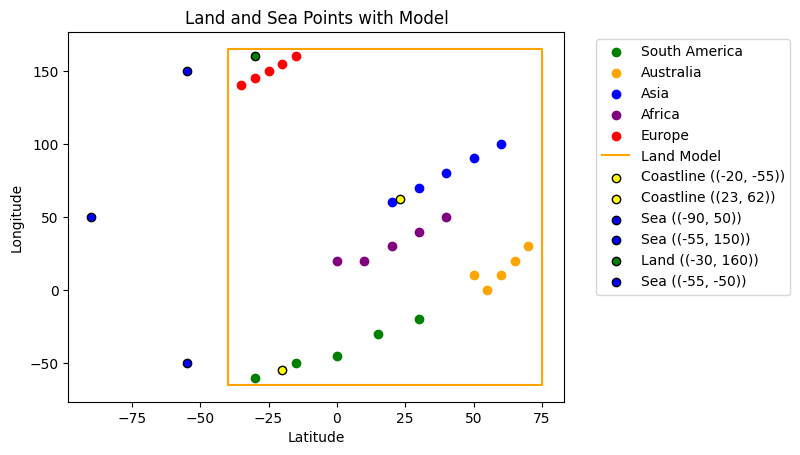

In [ ]:
#@title Main Execution

# This section calculates the total grid points, prior probabilities, likelihoods,
# defines the model box, classifies test points, prints the classifications, and
# plots the points and the model.

# Total points in the grid
total_points = len(grid_points)

# Calculate prior probabilities
P_land, P_sea = calculate_prior_probabilities(land_points, total_points)

# Calculate likelihoods
likelihoods_land, likelihoods_sea = calculate_likelihoods(grid_points, land_points)

# Define the bounds of the model box
all_land_x = [point[0] for points in land_points.values() for point in points]
all_land_y = [point[1] for points in land_points.values() for point in points]
x_min, x_max = min(all_land_x) - 5, max(all_land_x) + 5
y_min, y_max = min(all_land_y) - 5, max(all_land_y) + 5
box_bounds = (x_min, x_max, y_min, y_max)


# Define unknown test cases with more land points and fewer sea points
test_points = [
    # Land points inside the model
    (-20, -55), ## Near to the South America, should be Coastline
    (23, 62),##Near to the Asia, should be Coastline
    (-90, 50),## Far from land, should be Sea
    (-55, 150),## Far from land, should be Sea
    (-30, 160),##It should be Land，within defined land areas
    (-55, -50)## Far from land, should be Sea
]

# Classify test points
test_classifications = [classify_point(point, box_bounds) for point in test_points]

# Print test point classifications
print("\nTest Point Classifications:")
for point, classification in zip(test_points, test_classifications):
    print(f"Point {point}: {classification}")

# Plot the points and the model
plot_points(land_points, test_points, test_classifications, box_bounds)
